<a href="https://colab.research.google.com/github/Debasmita-Pal/Code_With_Python/blob/main/20MAI0018_DL_ASS3_QS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping


In [198]:
# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

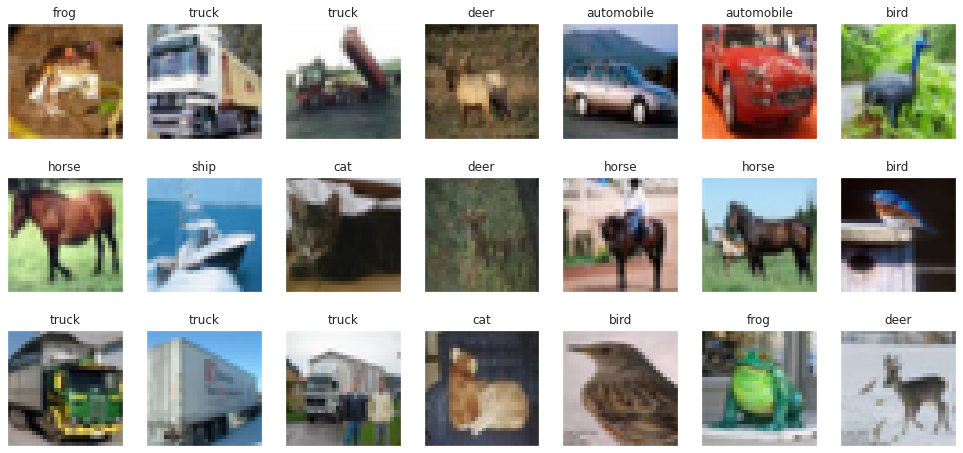

In [199]:
# Display the first 21 images of X_train
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [200]:
# Convert both X_train and X_test to grayscale
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])


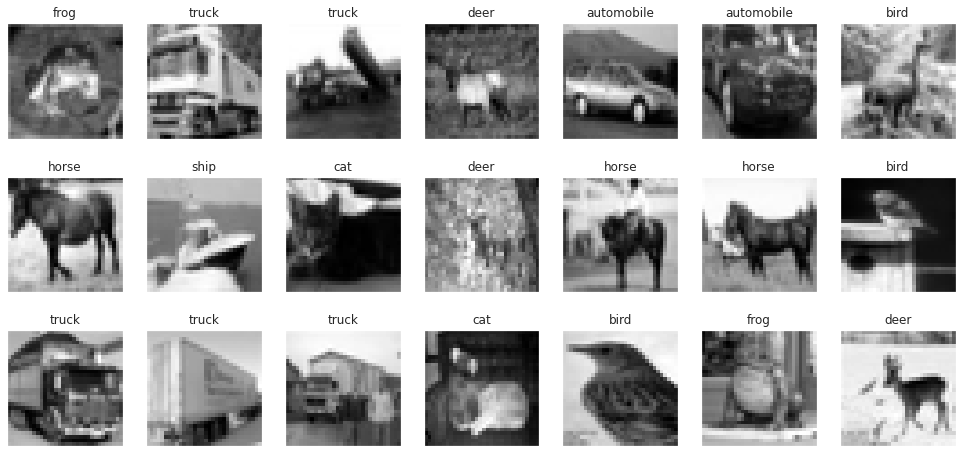

In [201]:
# Display the first 21 images of X_train (grayscale)
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [202]:
# Value normalization
X_train  = X_train/255
X_test  = X_test/255

In [203]:
# Label preprocessing
one_hot_encoder = OneHotEncoder(sparse=False)

In [204]:
one_hot_encoder.fit(y_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [205]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)


In [206]:
# Defining input shape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [207]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [208]:
np.random.seed(1000)

#Instantiation
model = Sequential()

#1st Convolutional Layer
model.add(Conv2D(filters=6, input_shape=(32,32,1), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(28,28), strides=(2,2), padding='same'))

#2nd Convolutional Layer
model.add(Conv2D(filters=16, input_shape=(14,14,6), kernel_size=(5, 5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(10,10), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(120, input_shape=(5,5,16)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

#2nd Fully Connected Layer
model.add(Dense(84))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#Output Layer
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

#Model Summary
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 8, 8, 6)           732       
_________________________________________________________________
batch_normalization_79 (Batc (None, 8, 8, 6)           24        
_________________________________________________________________
activation_79 (Activation)   (None, 8, 8, 6)           0         
_________________________________________________________________
average_pooling2d_32 (Averag (None, 4, 4, 6)           0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 4, 4, 16)          2416      
_________________________________________________________________
batch_normalization_80 (Batc (None, 4, 4, 16)          64        
_________________________________________________________________
activation_80 (Activation)   (None, 4, 4, 16)        

In [209]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

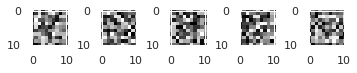

In [210]:
from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D,AveragePooling2D, BatchNormalization

import matplotlib.pyplot as plt

 

ann = Sequential()

x = Conv2D(filters=6,kernel_size=(11,11),input_shape=(32,32,1))

ann.add(x)

 

x1w = x.get_weights()[0][:,:,0,:]

for i in range(1,6):

      plt.subplot(5,5,i)

      plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")

plt.show()

In [214]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5) 

In [215]:
# Model training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[lrr])

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7965 - acc: 0.3363 - val_loss: 1.8992 - val_acc: 0.2971
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7940 - acc: 0.3405 - val_loss: 1.8485 - val_acc: 0.3270
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7897 - acc: 0.3425 - val_loss: 1.8516 - val_acc: 0.3059
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7879 - acc: 0.3412 - val_loss: 1.9626 - val_acc: 0.2971
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7813 - acc: 0.3425 - val_loss: 1.9963 - val_acc: 0.3001
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7694 - acc: 0.3440 - val_loss: 1.7018 - val_acc: 0.3771
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7616 - acc: 0.3505 - val_loss: 1.6994 - val_acc: 0.3771
Epoch 8/50
1563/1563 [==============================] - 9s 6ms

In [216]:
# Saving/loading model
model.save('CNN_CIFAR.h5')
model = load_model('CNN_CIFAR.h5')

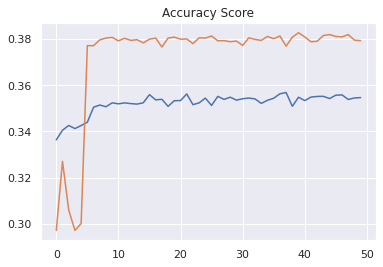

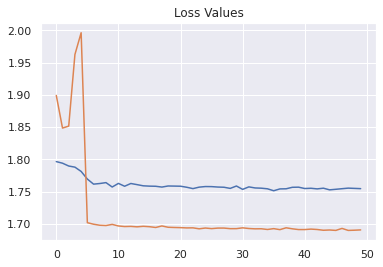

In [217]:
# Model evaluation
plt.title('Accuracy Score')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.title('Loss Values')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


In [218]:
# Predicting test data
predictions = model.predict(X_test)
predictions = one_hot_encoder.inverse_transform(predictions)

In [224]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predictions)
print('Accuracy : %.3f' %acc)

Accuracy : 0.379


In [219]:
y_test = one_hot_encoder.inverse_transform(y_test)

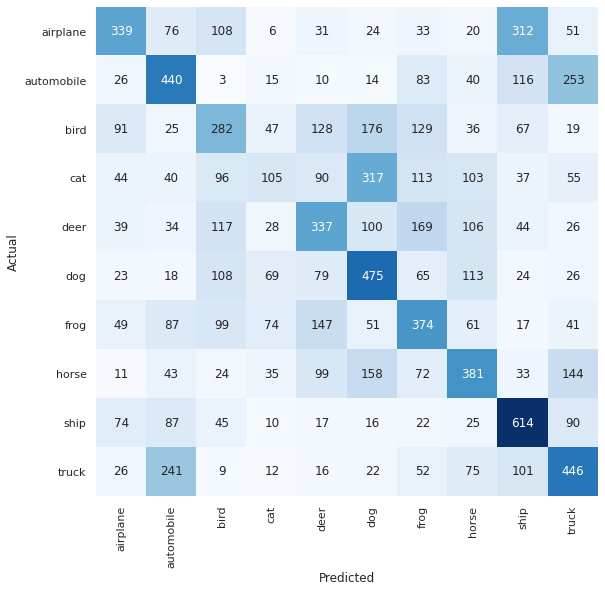

In [220]:
# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

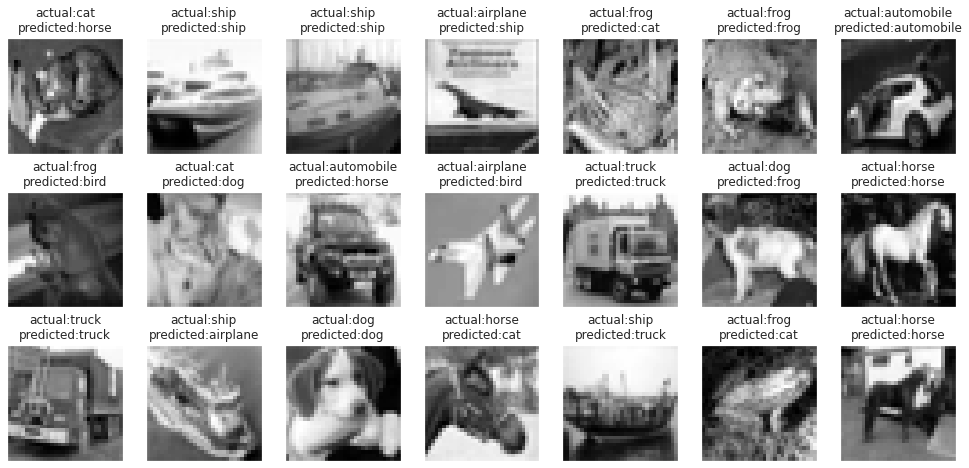

In [221]:
# Displaying test data with its actual and predicted label
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()